In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys
import os
os.chdir("../rsna_mammo")
sys.path.append("..")

In [16]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt

In [2]:
from rsna_mammo.src.datasets.rsna_mammo import RSNADataset

In [9]:
class augmentation:
    p_th=0.5
    roi_th_min=0.08
    roi_th_max=0.12
    p_crop_resize=0.75
    bbox_size_scale_min=0.75
    bbox_size_scale_max=1.25
    p_shuffle_view=0.0
    p_dup_view_1=0.0
    p_dup_view_2=0.0
    p_mask_view_1=0.0
    p_mask_view_2=0.0
    p_roi_crop=1.0
class cfg:
    num_classes=1
    num_folds=4
    test_fold=0  # Test fold for N-fold CV. Should be in [0, num_folds).
    val_fold=0  # Validation fold for N-fold CV. Should be in [0, num_folds).
    fold_path="./fold/train_with_fold.csv"
    seed=2023
    num_records=0
    phase="train"
    use_cache=False
    roi_th=0.1
    roi_buffer=30
    use_multi_view=False
    use_yolo=False
    positive_aug_num=0
    view=None
    augmentation=augmentation

In [3]:
df = RSNADataset.create_dataframe()

In [10]:
dataset = RSNADataset(df,cfg=cfg)

In [11]:
image = dataset.read_image(0)

In [20]:
x_min,y_min,x_max,y_max=dataset.get_roi_crop(image)

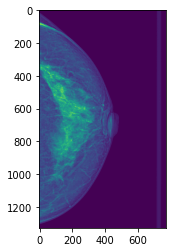

In [22]:
plt.imshow(image[y_min:y_max, x_min:x_max])

In [23]:
df[["xmin","ymin","xmax","ymax"]]

,xmin,ymin,xmax,ymax
0,334,0,1615,479
1,79,0,1453,560
2,82,1547,1535,2042
3,347,1603,1573,2044
4,150,0,1893,1001
...,...,...,...,...
54701,56,620,1963,2037
54702,303,4,1869,890
54703,283,0,1871,762
54704,95,1108,1943,2040


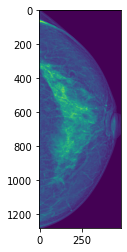

In [26]:
plt.imshow(image[334:1615,0:479])

In [25]:
x_min,y_min,x_max,y_max

(0, 315, 776, 1644)